<a href="https://colab.research.google.com/github/jyotiprasadkurmi/Walmart-Case-Study/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,binom
from scipy import stats

In [ ]:
!wget https://drive.google.com/file/d/1-G5Dbu-NzNgs6woq8nLCczJJJ-WeEBpt/view?usp=sharing

--2024-06-10 04:03:17--  https://drive.google.com/file/d/1-G5Dbu-NzNgs6woq8nLCczJJJ-WeEBpt/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 74.125.139.100, 74.125.139.138, 74.125.139.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.139.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing’

view?usp=sharing        [ <=>                ]  84.64K  --.-KB/s    in 0.002s  

2024-06-10 04:03:17 (36.3 MB/s) - ‘view?usp=sharing’ saved [86667]



In [ ]:
!gdown 1-G5Dbu-NzNgs6woq8nLCczJJJ-WeEBpt

Downloading...
From: https://drive.google.com/uc?id=1-G5Dbu-NzNgs6woq8nLCczJJJ-WeEBpt
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 113MB/s] 


# About Walmart
## Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.



# Business Problem
## The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [ ]:
df  = pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [ ]:
df.shape

(550068, 10)

## the dataset has 550068->Rows and 10->Columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


## No Null Value in the dataset

In [ ]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df.groupby(["Gender"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


* Mean purchases of male is higher than female


## We have 414259 Male and 135809 Female gender distributione

In [ ]:
df['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

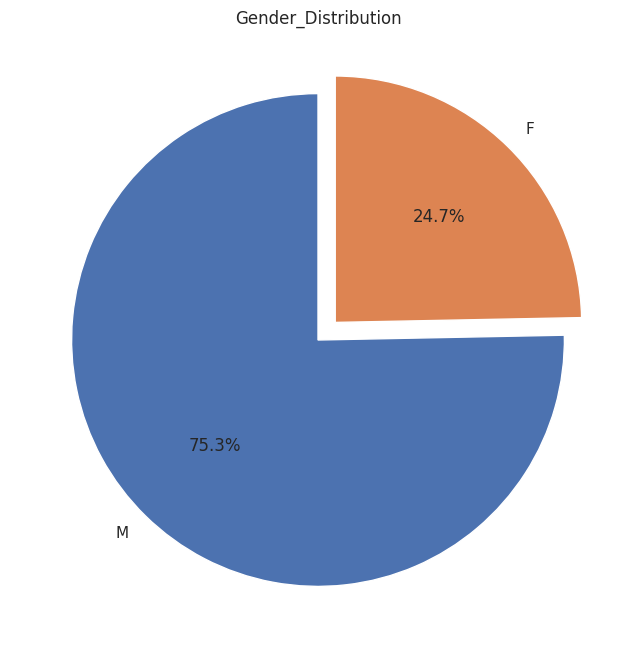

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,8))
plt.pie(df['Gender'].value_counts(),labels = ['M','F'],explode = (0,0.1),startangle = 90,autopct = '%1.1f%%')
plt.title('Gender_Distribution')
plt.show()

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

<Axes: ylabel='Purchase'>

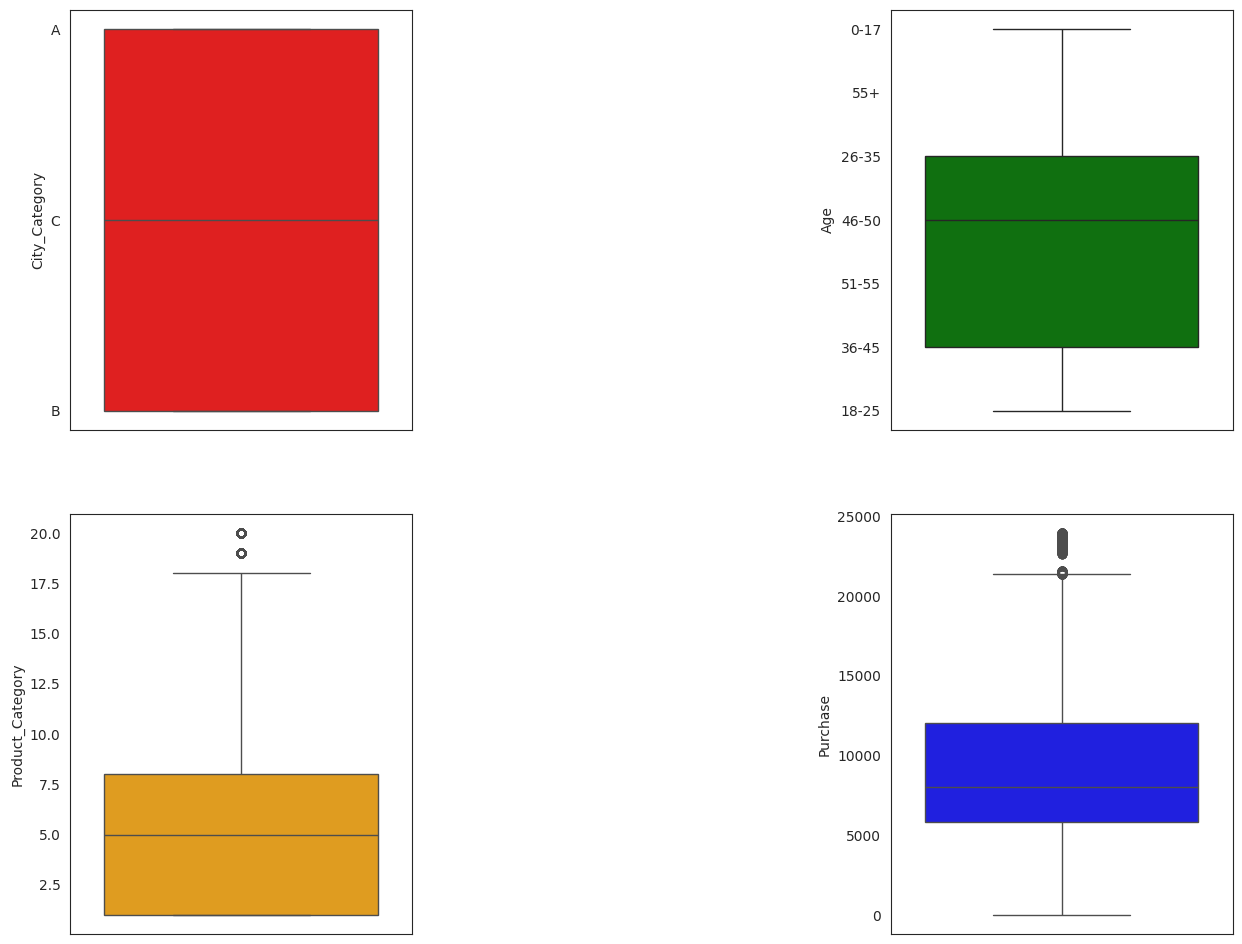

In [ ]:
fig = plt.figure(figsize = (15,12))


sns.set_style("white")
plt.subplot(2,3,1)
sns.boxplot(data = df,y = 'City_Category',color = 'red')

sns.set_style("white")
plt.subplot(2,3,3)
sns.boxplot(data = df,y = 'Age',color = 'green')



sns.set_style("white")
plt.subplot(2,3,4)
sns.boxplot(data = df,y = 'Product_Category',color = 'orange')

sns.set_style("white")
plt.subplot(2,3,6)
sns.boxplot(data = df,y = 'Purchase',color = 'blue')



* Most of the customer comes from cit_category *C*
* The Median age of the customer comes out to be of *46*-*50*
* The IQR for the Product purchases were in between the ranges from *5200* - *12000*

In [ ]:
df.groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [ ]:
df.groupby(['Age'])['User_ID'].nunique() / df['User_ID'].nunique() * 100

Age
0-17      3.700560
18-25    18.146325
26-35    34.849771
36-45    19.809879
46-50     9.013750
51-55     8.164997
55+       6.314717
Name: User_ID, dtype: float64

* 35% Customer lies between the age group of [26 - 35]
* 19% Customer lies between the age group of [36 - 45]

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Total Spent by Gender

In [ ]:
total_spent_by_gender = df.groupby(['Gender'])[['Purchase']].sum()
total_spent_by_gender = total_spent_by_gender.reset_index()
total_spent_by_gender

,Gender,Purchase
0,F,1186232642
1,M,3909580100


* Total amt spent by female👩🏻‍🦰 customer was 💰1186232642💰
* Total amt spent by male👳🏻‍♂️ customer was 💰3909580100💰

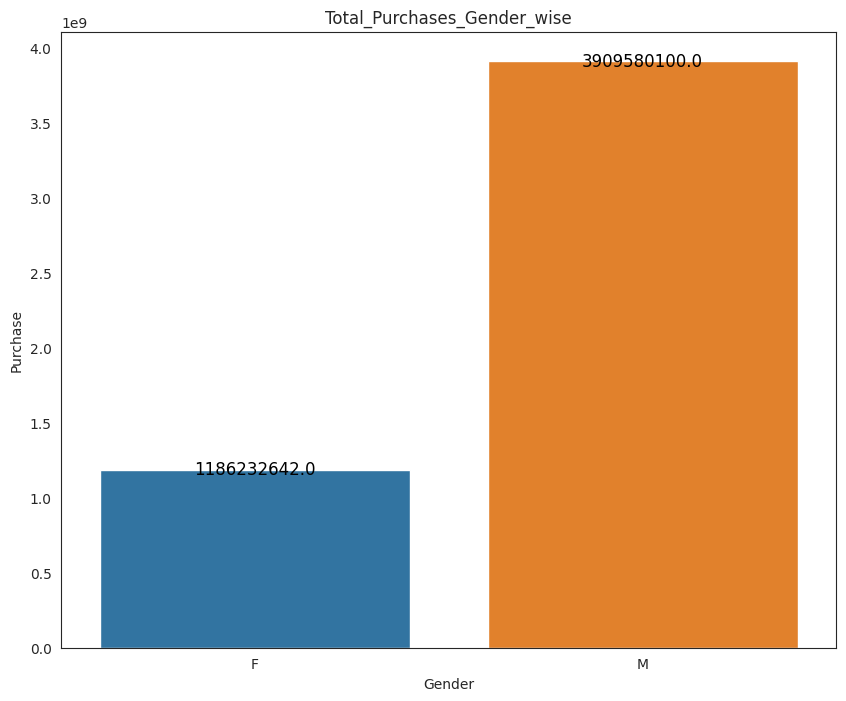

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style("white")
ax = sns.barplot(data = total_spent_by_gender,x = 'Gender', y = 'Purchase',hue = 'Gender' )

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 0.5),
                ha='center', va='center', fontsize=12, color='black')

plt.title("Total_Purchases_Gender_wise")
plt.show()

 # Visualization of Gender Distribution

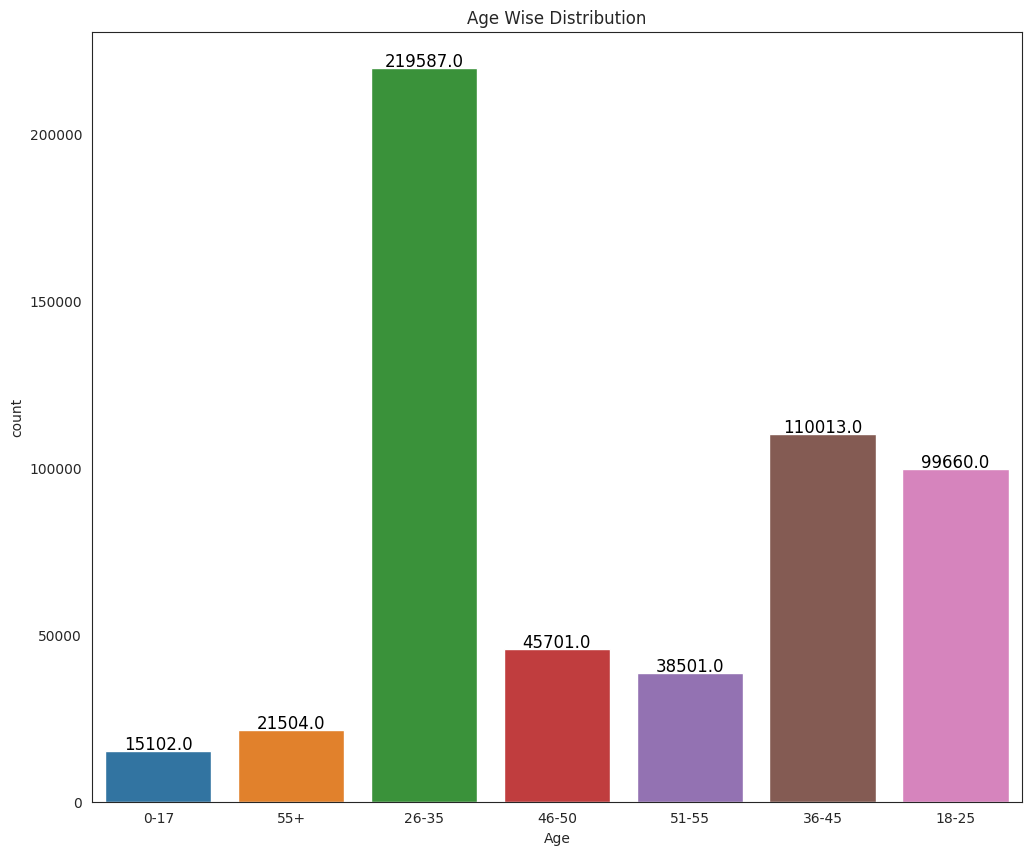

In [ ]:
fig = plt.figure(figsize=(12,10))
sns.set_style(style='white')

ax = sns.countplot(data=df, x = "Age",hue = "Age")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Age Wise Distribution")
plt.show()

* Here we can visually see the customer age distributions

Object `pallete` not found.


## Avg spent by Gender

In [ ]:
average_spent_by_gender = df.groupby('Gender')['Purchase'].mean()
average_spent_by_gender = average_spent_by_gender.reset_index()
average_spent_by_gender

,Gender,Purchase
0,F,8734.565765
1,M,9437.526040


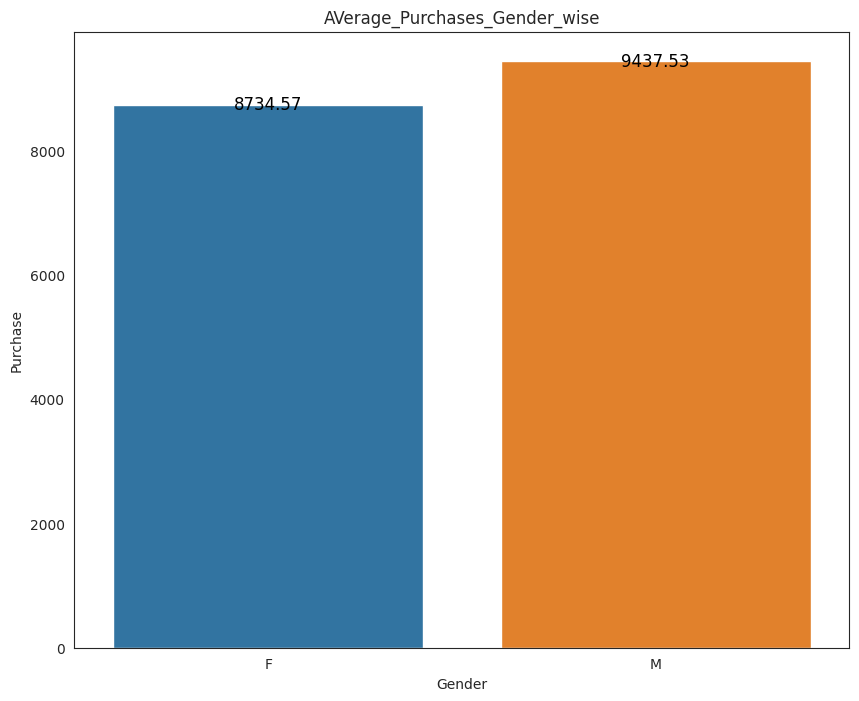

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style("white")
ax = sns.barplot(data = round(average_spent_by_gender,2),x = 'Gender', y = 'Purchase',hue = 'Gender' )

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 0.5),
                ha='center', va='center', fontsize=12, color='black')

plt.title("AVerage_Purchases_Gender_wise")
plt.show()

* Average Amount spent by Female👩🏻‍🦰 is 💰8734.57💰
*Average Amount spent by Male👩🏻👳🏻‍♂️ is 💰9437.53💰

# Distribution of Married 👩‍❤️‍👨 Vs Unmarried 🤷🏽‍♂️

In [ ]:
status = df['Marital_Status'].value_counts()
status

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

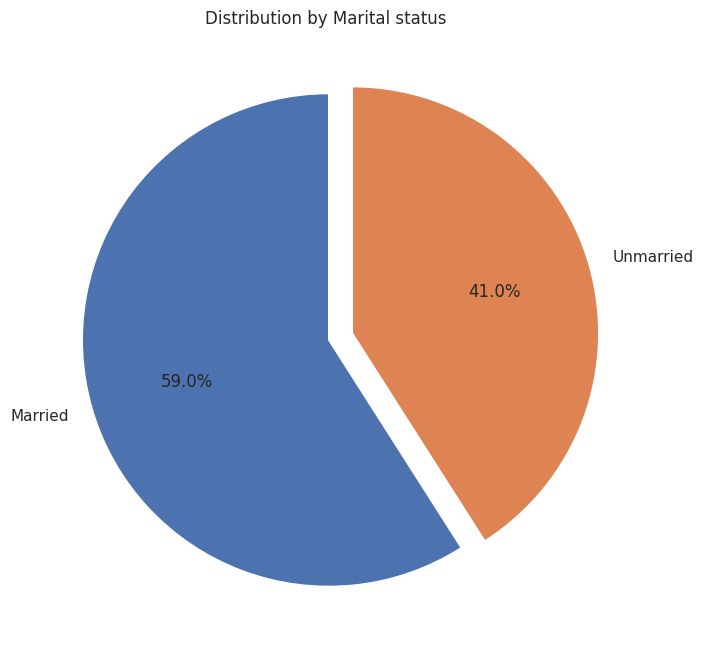

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style("white")
plt.pie(status,labels = ['Married','Unmarried'],explode = (0,0.1),startangle = 90,autopct = '%1.1f%%')
plt.title("Distribution by Marital status ")
plt.show()

* Most of the customers are *married* 👩‍❤️‍👨

# Distributions  of Stay_In_Current_City_Years

In [ ]:
df['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

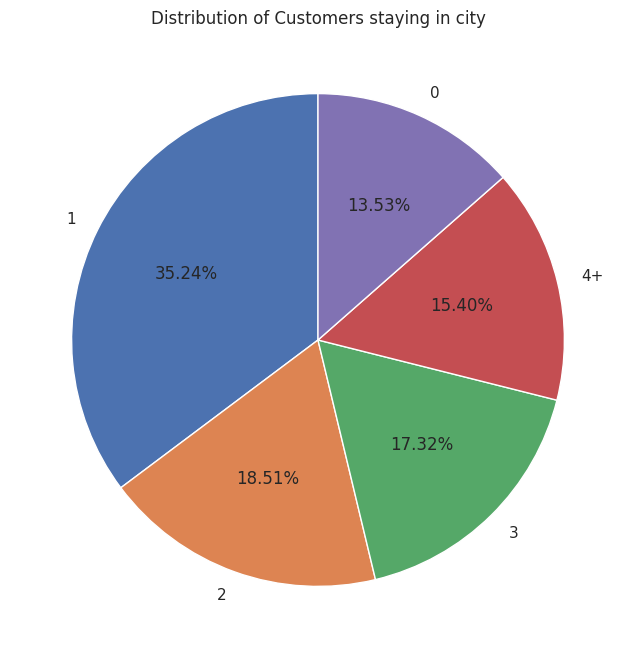

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style("white")
plt.pie(df['Stay_In_Current_City_Years'].value_counts(),labels = df["Stay_In_Current_City_Years"].value_counts().index,startangle = 90,autopct = '%1.2f%%')
plt.title("Distribution of Customers staying in city")
plt.show()

* Most of the customers stay in city for only 1 year

## Distribution of Customer city wise

In [ ]:
df['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [ ]:
df.groupby(['City_Category'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


*Most of the customers of City_Category C are Purchasing more*

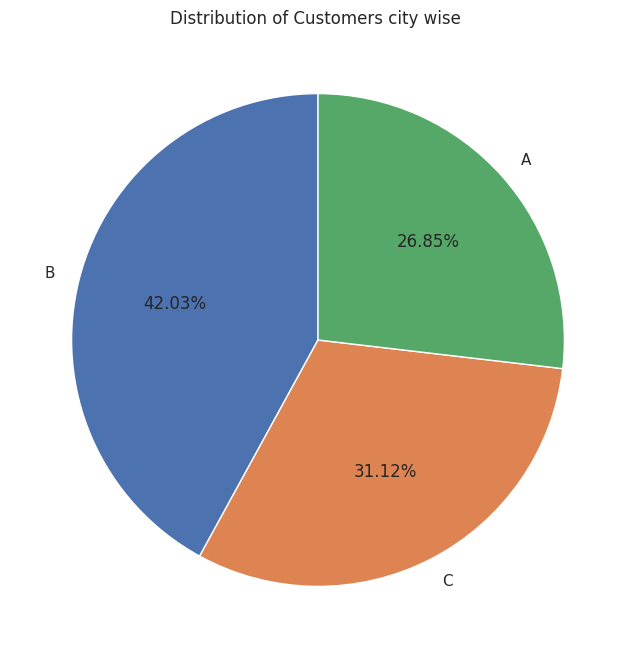

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style("white")
plt.pie(df['City_Category'].value_counts(),labels = df["City_Category"].value_counts().index,startangle = 90,autopct = '%1.2f%%')
plt.title("Distribution of Customers city wise ")
plt.show()

*Most of the customers comes from City_Category B*

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


##Confidence Interval for Male & Female Purchases

In [ ]:
male = df[df['Gender']=='M']['Purchase']
female = df[df['Gender']=='F']['Purchase']


In [ ]:
male_mean = male.mean()
male_mean
male_std = male.std()
male_std

female_mean = female.mean()
female_mean
female_std = female.std()

print(male_mean,male_std,female_mean,female_std)

9437.526040472265 5092.18620977797 8734.565765155476 4767.233289291458


In [ ]:
#95% _ confidence interval_male
male_ci = norm.interval(0.95, loc=male_mean, scale=male_std / np.sqrt(len(male)))
print("Confidence Interval for Average Spending (Male):", male_ci)

Confidence Interval for Average Spending (Male): (9422.01944736257, 9453.032633581959)


In [ ]:
# Confidence INterval for  Female at 95%
female_ci = norm.interval(0.95, loc=female_mean, scale=female_std / np.sqrt(len(female)))
print("Confidence Interval for Average Spending (female):", female_ci)

In [ ]:

def bootstrapping_Gender(sample1, sample2, smp_siz=500, itr_size=10000, confidence_level=0.95):
    # Bootstrap sampling
    smp1_means = [np.mean(np.random.choice(sample1, size=smp_siz)) for _ in range(itr_size)]
    smp2_means = [np.mean(np.random.choice(sample2, size=smp_siz)) for _ in range(itr_size)]

    # Calculate the Z-Critical value
    alpha = 1 - confidence_level
    z_critical = stats.norm.ppf(1 - alpha / 2)

    # Calculate the mean and standard deviation of the bootstrap sample means
    mean1, sigma1 = np.mean(smp1_means), np.std(smp1_means)
    mean2, sigma2 = np.mean(smp2_means), np.std(smp2_means)

    # Calculate confidence intervals
    lower_limit1, upper_limit1 = mean1 - z_critical * sigma1, mean1 + z_critical * sigma1
    lower_limit2, upper_limit2 = mean2 - z_critical * sigma2, mean2 + z_critical * sigma2

    # Plotting
    plt.figure(figsize=(14, 6))
    sns.set_style("white")

    sns.kdeplot(smp1_means, color="red", fill=True, linewidth=2, label="Male")
    sns.kdeplot(smp2_means, color='blue', fill=True, linewidth=2, label="Female")

    plt.axvline(mean1, color='yellow', linestyle='solid', linewidth=2, label=f"Mean (Male): {mean1:.2f}")
    plt.axvline(lower_limit1, color='red', linestyle='solid', linewidth=2, label=f"CI (Male): [{lower_limit1:.2f}, {upper_limit1:.2f}]")
    plt.axvline(upper_limit1, color='red', linestyle='solid', linewidth=2)

    plt.axvline(mean2, color='cyan', linestyle='dashdot', linewidth=2, label=f"Mean (Female): {mean2:.2f}")
    plt.axvline(lower_limit2, color='green', linestyle='dashdot', linewidth=2, label=f"CI (Female): [{lower_limit2:.2f}, {upper_limit2:.2f}]")
    plt.axvline(upper_limit2, color='green', linestyle='dashdot', linewidth=2)

    plt.title(f"{confidence_level*100}% Confidence Interval on Sample Size = {smp_siz}")
    plt.xlabel('Purchase Amount')
    plt.legend(loc='upper right')
    plt.show()

    return smp1_means, smp2_means, np.round(lower_limit1, 2), np.round(upper_limit1, 2), np.round(lower_limit2, 2), np.round(upper_limit2, 2)


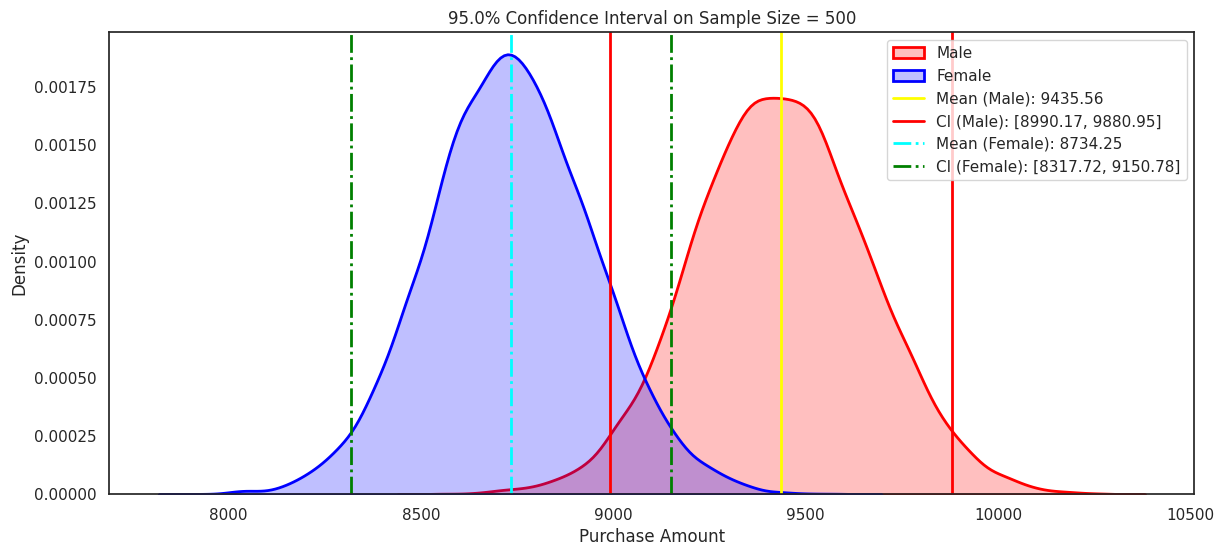

In [ ]:
Male = df[df['Gender']=='M']['Purchase']
Female = df[df['Gender']=='F']['Purchase']

smp1_means_m, smp2_means_m, lower_limit1, upper_limit1, lower_limit2, upper_limit2 = bootstrapping_Gender(Male, Female)


* we can see here that there is overlapping of both Male and Female spends

## 90% Confidence INterval

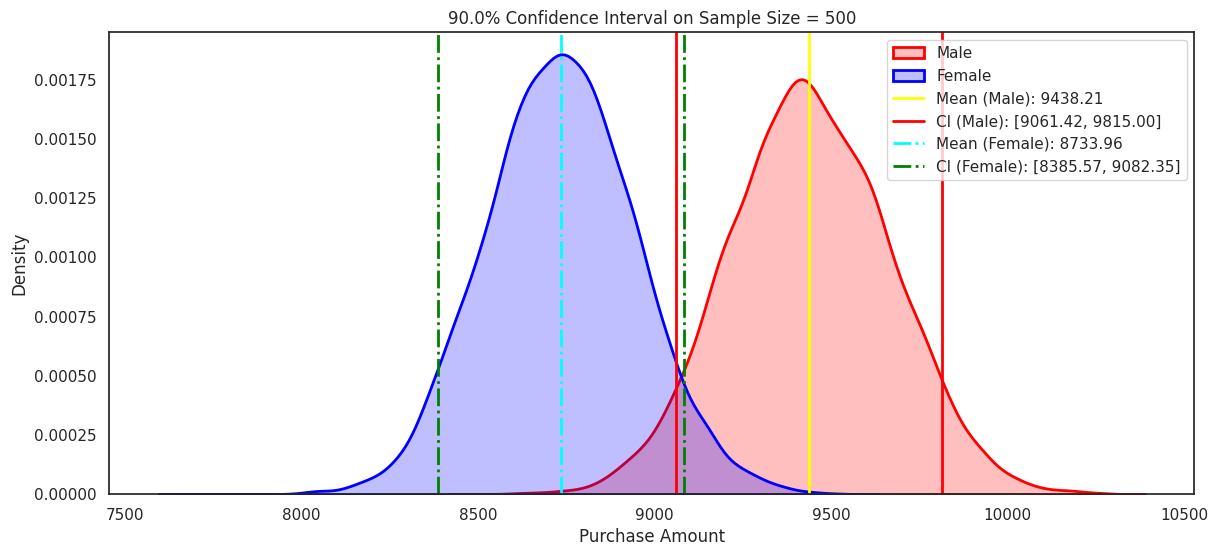

In [ ]:
smp1_means_m, smp2_means_m, lower_limit1, upper_limit1, lower_limit2, upper_limit2 = bootstrapping_Gender(Male, Female,confidence_level = 0.90)

## 99% Confidence Interval

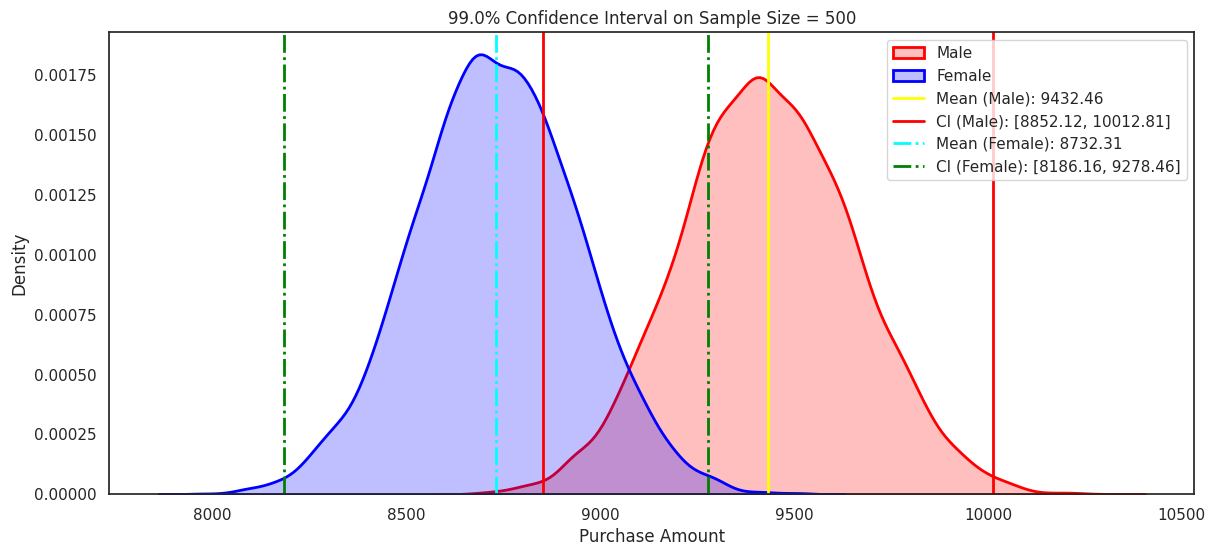

In [ ]:
smp1_means_m, smp2_means_m, lower_limit1, upper_limit1, lower_limit2, upper_limit2 = bootstrapping_Gender(Male, Female,confidence_level = 0.99)

In [ ]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


(9248.61641818668, 9283.198819656332)


* unmarried_CI ranges from (9248.61641818668, 9283.198819656332)[link text](https://)

## CI for Avg Age Spending groups

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
average_spending_by_age = df.groupby(['Age'])['Purchase'].mean()
average_spending_by_age


Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

* *here we can see the average spends done by different age groups customer*

In [ ]:
average_spending_age_std = df.groupby(['Age'])['Purchase'].mean().std()
average_spending_age_std

184.1669474086718

*we have avg_spending standard deviation of 184.17*

In [ ]:
 #calculating total no of age groups
 d= len(df.groupby(['Age'])['Purchase'])
 d

7

In [ ]:
# upper_limit and lower limit of the confidence interval for different age groups
age_ci = stats.norm.interval(0.95,loc = average_spending_by_age,scale = average_spending_age_std/np.sqrt(d))
age_ci

(array([8797.03436351, 9033.23332933, 9116.26035594, 9194.92041799,
        9072.19542054, 9398.37775403, 9199.85018252]),
 array([9069.89491738, 9306.09388319, 9389.1209098 , 9467.78097185,
        9345.0559744 , 9671.23830789, 9472.71073638]))

*Here we can see the CI for different age_groups*

## Married Vs Unmarried 95% CLT Interval
## Confidence Interval Calculation for Marital Status

In [ ]:

def bootstrapping_marital_status(sample1, sample2, smp_siz=500, itr_size=10000, confidence_level=0.95):
    # Bootstrap sampling
    smp1_means = [np.mean(np.random.choice(sample1, size=smp_siz)) for _ in range(itr_size)]
    smp2_means = [np.mean(np.random.choice(sample2, size=smp_siz)) for _ in range(itr_size)]

    # Calculate the Z-Critical value
    alpha = 1 - confidence_level
    z_critical = stats.norm.ppf(1 - alpha / 2)

    # Calculate the mean and standard deviation of the bootstrap sample means
    mean1, sigma1 = np.mean(smp1_means), np.std(smp1_means)
    mean2, sigma2 = np.mean(smp2_means), np.std(smp2_means)

    # Calculate confidence intervals
    lower_limit1, upper_limit1 = mean1 - z_critical * sigma1, mean1 + z_critical * sigma1
    lower_limit2, upper_limit2 = mean2 - z_critical * sigma2, mean2 + z_critical * sigma2

    # Plotting
    plt.figure(figsize=(14, 6))
    sns.set_style("white")

    sns.kdeplot(smp1_means, color="red", fill=True, linewidth=2, label="Married")
    sns.kdeplot(smp2_means, color='blue', fill=True, linewidth=2, label="Unmarried")

    plt.axvline(mean1, color='yellow', linestyle='solid', linewidth=2, label=f"Mean (Married): {mean1:.2f}")
    plt.axvline(lower_limit1, color='red', linestyle='solid', linewidth=2, label=f"CI (Married): [{lower_limit1:.2f}, {upper_limit1:.2f}]")
    plt.axvline(upper_limit1, color='red', linestyle='solid', linewidth=2)

    plt.axvline(mean2, color='cyan', linestyle='dashdot', linewidth=2, label=f"Mean (Unmarried): {mean2:.2f}")
    plt.axvline(lower_limit2, color='green', linestyle='dashdot', linewidth=2, label=f"CI (Unmarried): [{lower_limit2:.2f}, {upper_limit2:.2f}]")
    plt.axvline(upper_limit2, color='green', linestyle='dashdot', linewidth=2)

    plt.title(f"{confidence_level*100}% Confidence Interval on Sample Size = {smp_siz}")
    plt.xlabel('Purchase Amount')
    plt.legend(loc='upper right')
    plt.show()

    return smp1_means, smp2_means, np.round(lower_limit1, 2), np.round(upper_limit1, 2), np.round(lower_limit2, 2), np.round(upper_limit2, 2)


In [ ]:
married = df[df['Marital_Status']==1]['Purchase']
unmarried = df[df['Marital_Status']==0]['Purchase']

In [ ]:
#calculating mean and std deviation
married_mean = married.mean()
married_std = married.std()
print(married_mean,married_std)

9261.174574082374 5016.897377793055


In [ ]:
#married customer CI at 95%
married_ci = stats.norm.interval(0.95,loc = married_mean,scale = married_std/np.sqrt(len(married)))
print("Confidence Interval for married:",married_ci)

Confidence Interval for married: (9240.460427057078, 9281.888721107669)


* married_CI ranges from (9240.460427057078, 9281.888721107669)

In [ ]:
#calculating mean and std deviation
unmarried_mean = unmarried.mean()
unmarried_std = married.std()
print(unmarried_mean,unmarried_std)

9265.907618921507 5016.897377793055


* from this avg we can see that unmarried customer on an avg spends more

In [ ]:
#unmarried customer CI at 95%
unmarried_ci = stats.norm.interval(0.95,loc = unmarried_mean,scale = unmarried_std/np.sqrt(len(unmarried)))
print("Confidence Interval for unmarried:",unmarried_ci)

Confidence Interval for unmarried: (9248.652361862705, 9283.162875980308)


* unmarried_CI ranges from (9248.61641818668, 9283.198819656332)

#95% CI on sample_size = 500

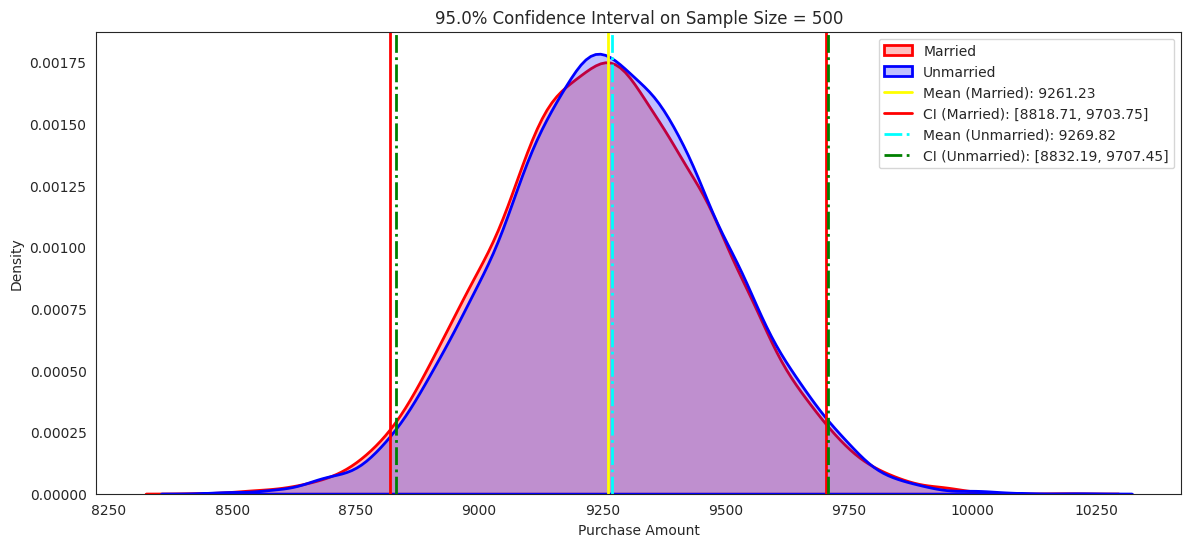

In [ ]:

married_data = df[df['Marital_Status'] == 1]['Purchase']
unmarried_data = df[df['Marital_Status'] == 0]['Purchase']

# Use the bootstrapping function
smp1_means_m, smp2_means_m, lower_limit1, upper_limit1, lower_limit2, upper_limit2 = bootstrapping_marital_status(married_data, unmarried_data)


## 90% CLI sample_size = 500

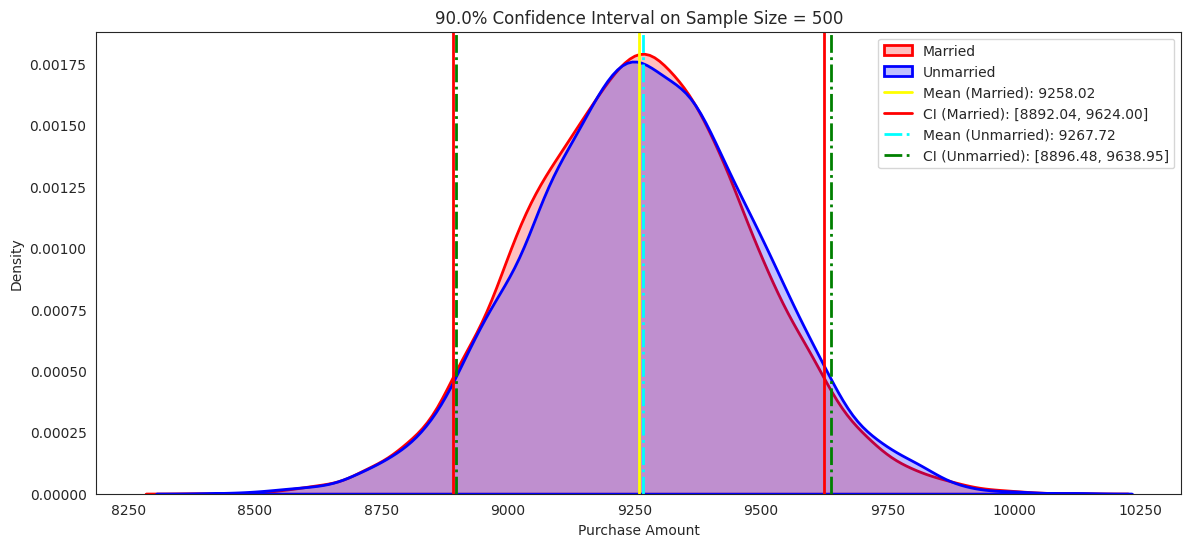

In [ ]:
# 90% CI
smp1_means_m, smp2_means_m, lower_limit1, upper_limit1, lower_limit2, upper_limit2 = bootstrapping_marital_status(married_data, unmarried_data,confidence_level =0.90)

## 99% CLI Sample size = 500

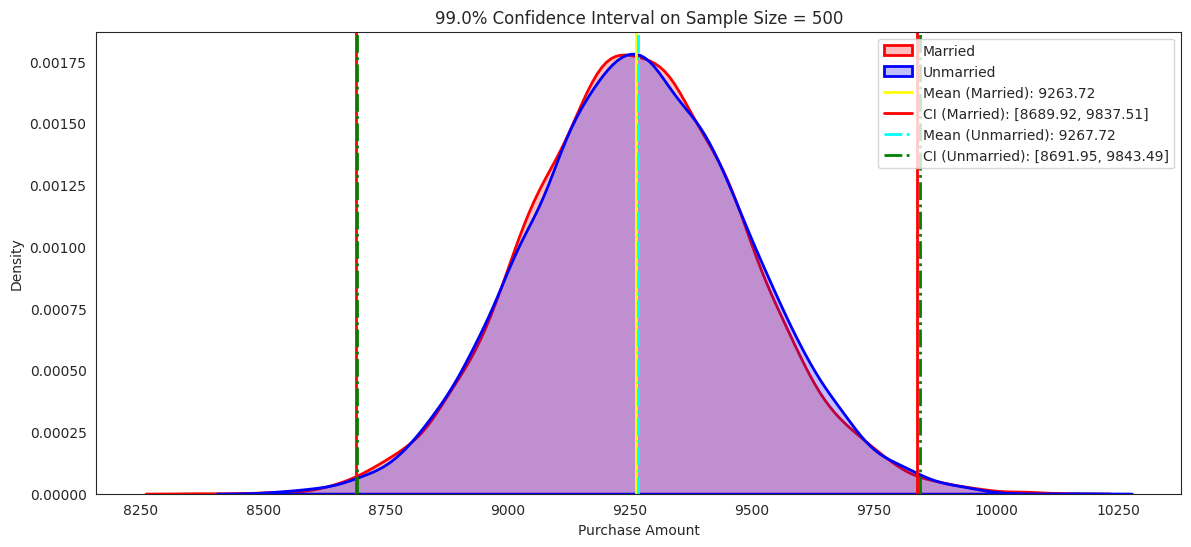

In [ ]:
smp1_means_m, smp2_means_m, lower_limit1, upper_limit1, lower_limit2, upper_limit2 = bootstrapping_marital_status(married_data, unmarried_data,confidence_level =0.99)

# Recommendations
*Based on our analysis, here are some actionable insights:

1. **Boost Female Spending**:
   - Women spend less on average compared to men.
   - Introduce targeted promotions and offers specifically for female customers to encourage higher spending during Black Friday.

2. **Increase Sales in the Kids Category (0-17 years)**:
   - This age group has the lowest average purchase amount.
   - Implement special deals and promotions for kids’ products to drive sales in this segment.

3. **Attract Young Shoppers**:
   - Younger customers (18-25 years) are a key demographic.
   - Offer discounts on popular items to attract more spending from this group.

4. **Engage Married Customers**:
   - Although there are more married customers, single customers spend more on average.
   - Develop strategies to increase the spending of married customers, such as family-focused promotions and bundled deals.

By implementing these strategies, Walmart can better cater to different customer segments and potentially increase overall sales.